In [21]:
import numpy as np
import json,pickle
import matplotlib.pyplot as plt

import matplotlib.patches as patches
import matplotlib.patheffects as path_effects

from matplotlib.pyplot import cm
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import LogNorm

In [22]:
paths = [path_effects.Stroke(linewidth=2, foreground='k'), path_effects.Normal()]
plt.ion()

#----------------------------------------------------------------
# Load the magic EDGE colourmap:
with open("../data/EDGE_cmap.json", "r") as f:
  EDGE_cmap = LinearSegmentedColormap("../data/EDGE_cmap.json", json.load(f))


In [23]:
# Load simulation data:
target_sims = np.repeat(['Halo1445_fiducial_hires'], 3)
target_index = np.repeat([0], 3)
GC_tforms = np.repeat([431.702462], 3)
titles = ['GCD Formation (Gas)', '(Dark matter)']
#----------------------------------------------------------------



In [24]:
fontsize = 10
lw = 1.5
plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
plt.rcParams['font.size'] = fontsize
plt.rcParams['axes.labelsize'] = fontsize
plt.rcParams['axes.linewidth'] = lw
plt.rcParams['lines.linewidth'] = lw
plt.rcParams['lines.markersize'] = 3
plt.rcParams['xtick.labelsize'] = fontsize - 2
plt.rcParams['ytick.labelsize'] = fontsize - 2
plt.rcParams['xtick.major.width'] = lw
plt.rcParams['xtick.minor.width'] = lw * (2/3.)
plt.rcParams['ytick.major.width'] = lw
plt.rcParams['ytick.minor.width'] = lw * (2/3.)
plt.rcParams['legend.fontsize'] = fontsize - 2


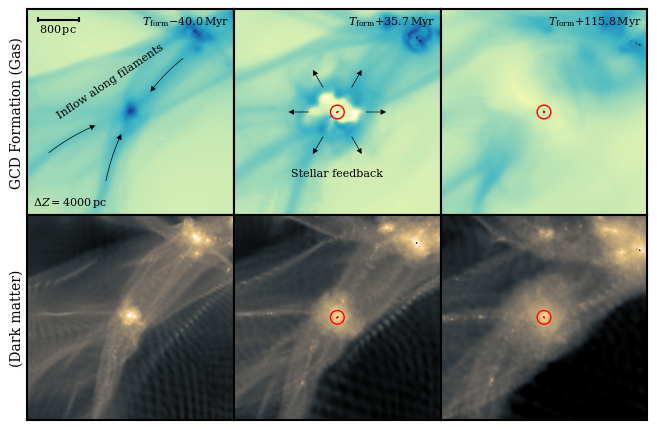

In [25]:
fig, ax = plt.subplots(figsize=(8, 8*(2/3.)), nrows=2, ncols=3, gridspec_kw={'hspace':0.0, 'wspace':0.0})
#---------------------------------------------------------------------------

# Loop over each panel:
#---------------------------------------------------------------------------
text_c = 'black'
star_c = 'black'
GC_c = 'red'

target_snaps = [9,10,11]

c_range1 = (8e3, 1e8)
c_range2 = (2e5, 1e8)

width = 4000 # [pc]
slice_width = 4000 # [pc]
for axes, sim, i, snap, GC_tform in zip(np.ravel(ax), target_sims.repeat(2), target_index.repeat(2), target_snaps*2, GC_tforms.repeat(2)):

  # Load the saved data:
  extent = np.array([-1,1,-1,1]) * width/2.
  if axes in np.ravel(ax)[[0,1,2]]:
    img = np.load('../data/%s_%i_delta%i_snap%i_gas_density_image.npy' % (sim, i, slice_width, snap))
    img_plot = axes.imshow(img, origin='lower', extent=extent, cmap=cm.YlGnBu, norm=LogNorm())
    img_plot.set_clim(*c_range1)
  else:
    img = np.load('../data/%s_%i_delta%i_snap%i_DM_density_image.npy' % (sim, i, slice_width, snap))
    img_plot = axes.imshow(img, origin='lower', extent=extent, cmap=EDGE_cmap, norm=LogNorm())
    img_plot.set_clim(*c_range2)

  filename = '../data/GCplot_delta%i_dict.pk1' % slice_width
  with open(filename, 'rb') as file:
    props = pickle.load(file)
  GC = props[sim][i][snap]['GC_stars']
  pos = props[sim][i][snap]['pos']
  GC_pos = props[sim][i][snap]['GC_pos']
  GC_vel = props[sim][i][snap]['GC_vel']

  axes.scatter(pos[~GC,0], pos[~GC,1], color=star_c, s=0.5, edgecolors='none', alpha=0.3)
  axes.scatter(pos[GC,0], pos[GC,1], color='red', s=0.5, edgecolors='none', alpha=1.0)

  axes.set_xlim(*extent[[0,1]])
  axes.set_ylim(*extent[[2,3]])
  axes.set_facecolor('white')
  axes.set_xticks([])
  axes.set_yticks([])
  axes.set_aspect('auto')

  # Add annotation for the GC:
  ring_width = 100 * (8/3.)
  ring = patches.Circle(GC_pos[[0,1]], radius=ring_width/2., facecolor='None', edgecolor=GC_c, lw=1)
  axes.add_artist(ring)

  if axes in np.ravel(ax)[[0,1,2]]:
    relative_time = props[sim][i][snap]['time'] - GC_tform
    if np.sign(relative_time) >= 0:
      sign = '+'
    else:
      sign = '-'
    string = r'$T_{\rm{form}}\rm{%s}%.1f\,\rm{Myr}$' % (sign, np.abs(relative_time))
    axes.text(0.975, 0.975, string, va='top', ha='right', fontsize=fontsize-2, color=text_c, transform=axes.transAxes)
#---------------------------------------------------------------------------

# Misc designs:
#---------------------------------------------------------------------------
# Add row labels:
for i, title in enumerate(titles):
  ax[i,0].text(-0.05, 0.5, title, ha='center', va='center', fontsize=fontsize, rotation=90, transform=ax[i,0].transAxes)

# Distance bar labels:
ruler = int('%.0f' % float('%.1g' % (width/5)))
corner1 = width/2. - (0.1*width/2.) - ruler
corner2 = 0.9*width/2.
corner1 = 0.1*width/2. - width/2.
cap = 0.025 * width/2.
for lw, color, order, capstyle in zip([1.5], ['k'], [100], ['butt']):
  _, _, caps = ax[0,0].errorbar([corner1, corner1+ruler], np.ones(2)*corner2, yerr=np.ones(2)*cap, \
                                color=color, linewidth=lw, ecolor=color, elinewidth=lw, zorder=order)
  caps[0].set_capstyle(capstyle)
ax[0,0].text(corner1 + ruler/2., corner2 - 0.025*width/2.,  r'$%.0f\,$pc' % ruler, \
             va='top', ha='center', color=text_c, fontsize=fontsize-2)

# Add delta:
ax[0,0].text(0.025, 0.025, r'$\Delta Z=%i\,$pc' % (slice_width), va='bottom', ha='left', color=text_c, \
             fontsize=fontsize-2, transform=ax[0,0].transAxes)
#---------------------------------------------------------------------------

# Annotations:
#---------------------------------------------------------------------------
style = "Simple, tail_width=0.5, head_width=4, head_length=4"
kw = dict(arrowstyle=style, color="k", lw=0)
a1 = patches.FancyArrowPatch((-1300, -550), (-300, -100),
                             connectionstyle="arc3,rad=.1", **kw)
a2 = patches.FancyArrowPatch((1200, 800), (300, 220),
                             connectionstyle="arc3,rad=.075", **kw)
a1 = patches.FancyArrowPatch((-490, -1400), (-160, -380),
                             connectionstyle="arc3,rad=-.065", **kw)
a2 = patches.FancyArrowPatch((1060, 1080), (350, 350),
                             connectionstyle="arc3,rad=.075", **kw)
a3 = patches.FancyArrowPatch((-1630, -830), (-630, -240),
                             connectionstyle="arc3,rad=-.075", **kw)
ax[0,0].add_patch(a1)
ax[0,0].add_patch(a2)
ax[0,0].add_patch(a3)
ax[0,0].text(0.4, 0.65, 'Inflow along filaments', fontsize=fontsize-2, ha='center', va='center', rotation=34, transform=ax[0,0].transAxes)

def PointsInCircum(r,n=100):
  return [(np.cos(2*np.pi/n*x)*r,np.sin(2*np.pi/n*x)*r) for x in range(0,n+1)]
spokes = 6
insides = PointsInCircum(500, spokes)
outsides = PointsInCircum(1000, spokes)
for i in range(spokes):
  a = patches.FancyArrowPatch(insides[i], outsides[i],
                              connectionstyle="arc3,rad=.0", **kw)
  ax[0,1].add_patch(a)
ax[0,1].text(0.5, 0.2, 'Stellar feedback', fontsize=fontsize-2, ha='center', va='center', transform=ax[0,1].transAxes)
#---------------------------------------------------------------------------

plt.savefig('../Figures/Fig4.pdf', bbox_inches='tight', dpi=750)
plt.savefig('../Figures/Fig4.png', bbox_inches='tight', dpi=750)

